### Exploratory Data Analysis for Netflix Analytics ###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

a)Veri Yapısı ve Eksik Veriler

1)Veri setinde hangi sütunlar var ve her birinin veri tipi nedir?

2)Eksik veri var mı? Hangi sütunlarda yoğunlukta?

b)Temel Dağılım Analizi

3)Netflix'te kaç farklı içerik türü var? (Film, Dizi, vb.)

4)Hangi yıllarda daha fazla içerik eklenmiş?

5)En çok içerik üreten ülkeler hangileri?

c)İçerik Analizi

6)En çok temsil edilen türler (genre) neler?

7)En çok içerikte yer alan oyuncular kimler?

8)En uzun açıklamalı içerikler hangileri?

d)Zaman Analizi

9)Yıllara göre içerik türlerinin dağılımı nasıl değişmiş?

10)Belirli bir yıl için en çok eklenen tür ne?

e)İçerik Uzunluğu (Sadece filmler için)

11)Film sürelerinin dağılımı nasıl?

12)Ortalama film süresi nedir?

13)En uzun/En kısa filmler hangileri?

f)Dil ve Ülke Analizi

14)Hangi dillerde içerikler var?


In [236]:
df = pd.read_csv('netflix_titles.csv')

In [237]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [50]:
### 1)Veri setinde hangi sütunlar var ve her birinin veri tipi nedir? ###

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [52]:
### 2)Eksik veri var mı? Hangi sütunlarda yoğunlukta? ###
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [55]:
### 3)Netflix'te kaç farklı içerik türü var? (Film, Dizi, vb.) ###
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [69]:
### 4) Hangi yıllarda daha fazla içerik eklenmiş? ###
df.groupby('release_year', as_index=False)['show_id'].count().sort_values(by= 'show_id', ascending=False)

,release_year,show_id
70,2018,1147
69,2017,1032
71,2019,1030
72,2020,953
68,2016,902
...,...,...
11,1959,1
13,1961,1
6,1947,1
18,1966,1


In [70]:
### 5)En çok içerik üreten ülkeler hangileri? ###
df.groupby('country', as_index = False)['show_id'].count().sort_values(by = 'show_id', ascending = False)

,country,show_id
603,United States,2818
251,India,972
506,United Kingdom,419
319,Japan,245
435,South Korea,199
...,...,...
281,"Ireland, Canada, Luxembourg, United States, Un...",1
282,"Ireland, Canada, United Kingdom, United States",1
283,"Ireland, Canada, United States, United Kingdom",1
284,"Ireland, France, Iceland, United States, Mexic...",1


In [81]:
### 6)En çok temsil edilen türler (genre) neler? ###

genre_series = df['listed_in'].dropna().str.split(', ').explode()

top_ten = genre_series.value_counts().head(10)

top_ten

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [84]:
### 7) En çok içerikte yer alan oyuncular kimler?? ###

cast_list = df['cast'].dropna().str.split(', ').explode()

cast_list.value_counts().head(10)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

In [91]:
### 8)En uzun açıklamalı içerikler hangileri?###

df['description_len'] = df['description'].fillna('').apply(len)

In [99]:
df[['title','description','description_len']].sort_values(by = 'description_len', ascending = False).head(5)

,title,description,description_len
4948,Billu,An Indian village is abuzz with news that a ma...,248
4797,Namastey London,"To her Indian parents' dismay, London-born Jas...",248
7678,Opium and the Kung Fu Master,"Leader of the Ten Kwangtung Tigers, Tieh Chiao...",246
8156,Teen Patti,Luck brings together math expert Perci Trachte...,246
6221,Balto 2: Wolf Quest,"Half-dog, half-wolf Balto (voiced by Maurice L...",245


In [100]:
### 9) En çok içerikte yer alan oyuncular kimler? ###

cast_values = df['cast'].dropna()


In [103]:
cast_list = cast_values.str.split(', ').explode()

In [108]:
top_actors = cast_list.value_counts().head(10)
top_actors

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

In [114]:
### 10)Yıllara göre içerik türlerinin dağılımı nasıl değişmiş ###

content_type = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
type_by_year = content_type.sort_index()

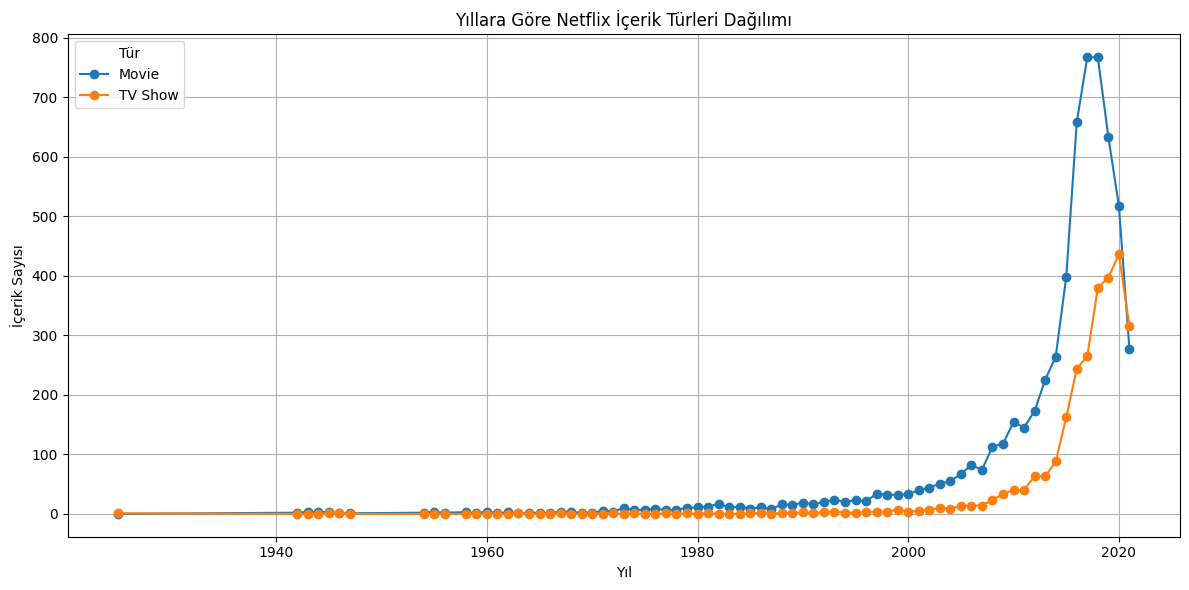

In [116]:
type_by_year.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Yıllara Göre Netflix İçerik Türleri Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.legend(title='Tür')
plt.grid(True)
plt.tight_layout()
plt.show()

In [149]:
## 12)Film sürelerinin dağılımı nasıl? ## 

type_duration = df[['type','duration']].dropna()
type_duration = type_duration[type_duration['type'] == 'Movie'].sort_values(by = 'duration', ascending=True)

In [157]:
type_duration['duration'] = type_duration['duration'].astype(str).str.replace(' min', ' ').astype(int)
type_duration

,type,duration
3535,Movie,10
7849,Movie,100
8750,Movie,100
4698,Movie,100
2918,Movie,100
...,...,...
8685,Movie,99
3798,Movie,99
7089,Movie,99
8281,Movie,99


<Axes: ylabel='Frequency'>

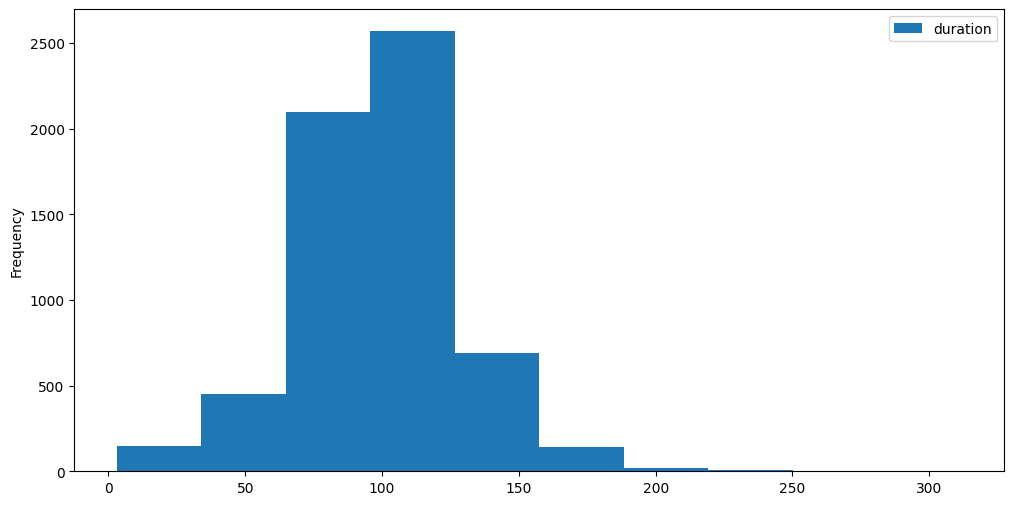

In [162]:
type_duration.plot(kind = 'hist', figsize=(12, 6))

In [188]:
## 12)Ortalama film süresi nedir? ##

just_movie = df[df['type'] == 'Movie'].dropna()

movie_duration = just_movie[['duration']].dropna()

In [205]:
duration = movie_duration['duration'].astype(str).str.replace(' min', ' ').astype(int).mean()

In [200]:
duration

7       125
9       104
12      127
24      166
27      103
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5185, dtype: int32

In [219]:
## 13)En uzun/En kısa filmler hangileri? ##

main_table['duration'] = (
    main_table['duration']
    .astype(str)
    .str.replace(' min', '', regex=False)
    .astype(int)
)

main_table

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_len
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",151
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,151
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,141
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,148
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,136
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",150
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,137
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",149


In [222]:
print("En kısa film:")
print(main_table.loc[main_table['duration'].idxmin()][['title', 'duration']])

print("\nEn uzun film:")
print(main_table.loc[main_table['duration'].idxmax()][['title', 'duration']])


En kısa film:
title       Cops and Robbers
duration                   8
Name: 1484, dtype: object

En uzun film:
title       The School of Mischief
duration                       253
Name: 2491, dtype: object


In [238]:
## 14)Hangi dillerde içerikler var? ##

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [250]:
country_list = df[['country']].dropna()

country_list = (country_list['country'].str
                .split(' ')
                .explode()
               )

country_list.unique()

array(['United', 'States', 'South', 'Africa', 'India', 'States,',
       'Ghana,', 'Burkina', 'Faso,', 'Kingdom,', 'Germany,', 'Ethiopia',
       'Kingdom', 'Czech', 'Republic', 'Mexico', 'Turkey', 'Australia',
       'India,', 'France', 'Finland', 'China,', 'Canada,', 'Africa,',
       'Japan', 'Nigeria', 'Spain,', 'Belgium', 'France,', 'Korea',
       'Spain', 'Singapore', 'Australia,', 'Canada', 'Italy,', 'Romania,',
       'Argentina,', 'Venezuela', 'Hong', 'Kong', 'Russia', 'Germany',
       ',', 'Ireland', 'Nepal', 'New', 'Zealand,', 'Italy', 'Brazil,',
       'Greece', 'Argentina', 'Jordan', 'Colombia', 'Belgium,',
       'Switzerland,', 'Israel,', 'Brazil', 'Taiwan', 'Bulgaria,',
       'China', 'Algeria', 'Poland', 'Zealand', 'Saudi', 'Arabia',
       'Thailand', 'Indonesia', 'Egypt,', 'Denmark,', 'Switzerland',
       'Kong,', 'Kuwait,', 'Netherlands,', 'Ireland,', 'Egypt',
       'Malaysia', 'Israel', 'Netherlands', 'Korea,', 'Vietnam', 'Japan,',
       'Hungary', 'Sweden', 